In [184]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools

from mpl_toolkits.mplot3d import axes3d

Correction on original assignment: Where it read delta(o)=gamma, it should have read gamma=1/delta(o).

The following vector field plot treats probabilistic factors as in expectation and assumes that two components of the opinion vector have a constant difference of 0.5 between the two individuals.
Green trajectories indicate situations in which the two individuals resolve to befriend each other and agree. Dark blue indicates a bond breaking. Light blue is a sign of stack overflow which should be fixed in a next iteration.


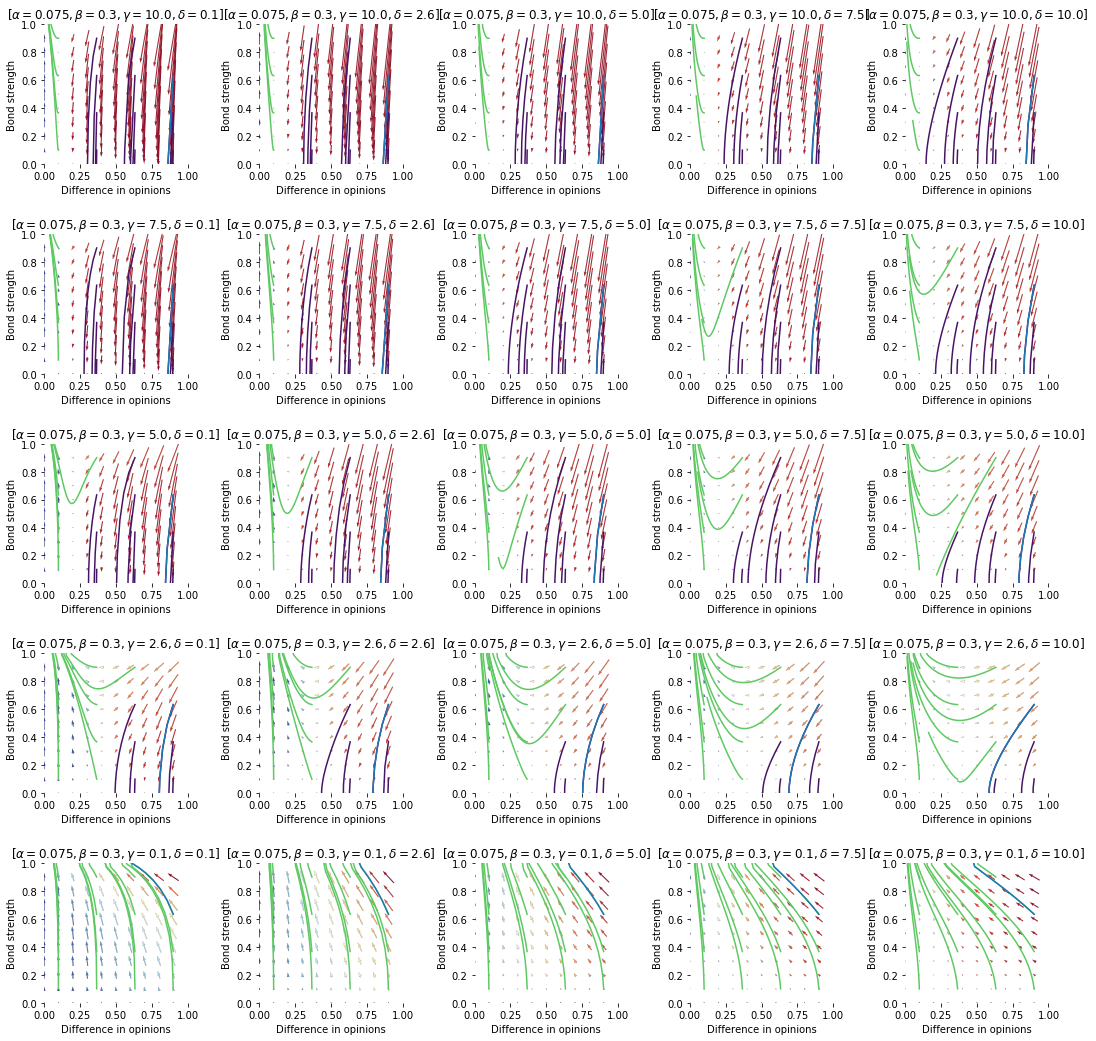

In [215]:
print('Correction on original assignment: Where it read delta(o)=gamma, it should have read gamma=1/delta(o).')
print('')
print('The following vector field plot treats probabilistic factors as in expectation and assumes that two components of the opinion vector have a constant difference of 0.5 between the two individuals.')
print('Green trajectories indicate situations in which the two individuals resolve to befriend each other and agree. Dark blue indicates a bond breaking. Light blue is a sign of stack overflow which should be fixed in a next iteration.')

alpha = 0.075
beta = 0.3
gamma = 1
delta = 0.1

n_plots = 5
cmap = plt.cm.viridis


gammas = np.linspace(0.1,10,n_plots)
deltas = np.linspace(0.1,10,n_plots)


diffop, bond = np.meshgrid(np.arange(0, 1, .1), np.arange(0, 1, .1))


fig, axes = plt.subplots(n_plots,n_plots,figsize=(18,18))

distanceops = 2



for i,g in enumerate(gammas):
    for j,d in enumerate(deltas):
        
        delta_o = alpha*-1*diffop*bond
        
    
        delta_w = beta*bond*(0.9-0.1**((np.sqrt(diffop**2 + np.sqrt(0.5+diffop**2)))/deltas[j]))*(1-bond*(0.9-0.1**((np.sqrt(diffop**2 + np.sqrt(0.5+diffop**2)))/deltas[j])))*(1-gammas[i]*abs(diffop))
        
        axes[n_plots-1 - i,j].set_title(r'[$\alpha={},\beta={},\gamma={}, \delta={}$]'.format(alpha,beta,round(gammas[i],1),round(deltas[j],1),
                           fontsize=2))
        axes[n_plots-1 - i,j].quiver(diffop, bond, delta_o, delta_w, #units='width',
                                    np.arctan2(delta_o, delta_w), angles='xy', scale_units='xy',
                                    scale=.8, pivot='mid', cmap='RdYlBu', edgecolor='k',
                                    linewidth=0.1)#,color='g')
        #qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
        #                   coordinates='figure')

        axes[n_plots-1 - i,j].set_xlabel('Difference in opinions')
        axes[n_plots-1 - i,j].set_ylabel('Bond strength')
        axes[n_plots-1 - i,j].spines['top'].set_visible(False)
        axes[n_plots-1 - i,j].spines['right'].set_visible(False)
        axes[n_plots-1 - i,j].spines['bottom'].set_visible(False)
        axes[n_plots-1 - i,j].spines['left'].set_visible(False)
        axes[n_plots-1 - i,j].set_xlim(0,1)
        axes[n_plots-1 - i,j].set_ylim(0,1)
        
        
#         trajectories = np.zeros((10,10,100,2))
        
        
#         trajectories[]
        
#         for i,dop_0 in enumerate(np.linspace(0,1,10)):
#             for j,bnd_0 in enumerate(np.linspace(0,1,10)):
#                 for t in range(100):
#                     trajectories[i,j,t] = 
        for n in range(16):
            if n == 15: continue
            T = 50
            trajectory = np.zeros((T,2))
            dop_0,bnd_0 = list(itertools.product(np.linspace(0.1,0.9,4),np.linspace(0.1,0.9,4)))[n]
            for t in range(T):

                trajectory[t,0] = dop_0
                trajectory[t,1] = bnd_0
                

                do = alpha*-1*dop_0*bnd_0
                dw = beta*bnd*(0.9-0.1**((np.sqrt(dop_0**2 + np.sqrt(0.5+dop_0**2)))/deltas[j]))*(1-bnd_0*(0.9-0.1**((np.sqrt(dop_0**2 + np.sqrt(0.5+dop_0**2)))/deltas[j])))*(1-gammas[i]*abs(dop_0))

                dop_0 = dop_0 + do
                bnd_0 = bnd_0 + dw
                
                if bnd_0 < 0:
                    bnd_0 = -0.1
                if bnd_0 > 1:
                    bnd_0 = 1.1
                    

#           
            
            if np.any(trajectory[t,1]<0.05):
                axes[n_plots-1 - i,j].plot(trajectory[:,0], trajectory[:,1], color = cmap(0.05))
            else: # np.any(trajectory[t,1]<0.05):
                #print(bnd_0)
                axes[n_plots-1 - i,j].plot(trajectory[:,0], trajectory[:,1], color = cmap(0.75))
                

        
        axes[n_plots-1 - i,j].plot(trajectory[:,0], trajectory[:,1])

plt.subplots_adjust(hspace=0.5, wspace = 0.5)
plt.show()


#delta_w = beta*0.9*bond*(1 - 0.1**((np.sqrt(diffop**2 + distanceops))/deltas[j]))*(1-0.9*bond*(1 - 0.1**((np.sqrt(diffop**2 + distanceops))/deltas[j])))*(1-gammas[i]*abs(diffop))

As it can be observed, when alpha=0.075, beta=0.4, gamma=4.5, 
difference in opinions = 0.633  and bond strength = 0.9,
there is a critical point between delta = 7.5 and delta = 10 that determines whether the two individuals will agree and befriend each other or cut their ties. While on my the paper I submitted I determined that gamma and delta determined equilibria of the system independently, there is a clear interaction of the parameters to determine the fate of the system.


beta\*bond\*(0.9-0.1^((np.sqrt(diffop^2 + np.sqrt(0.5+diffop^2)))/delta))\*(1-bond\*(0.9-0.1^((np.sqrt(diffop^2 + np.sqrt(0.5+diffop^2)))/delta)))\*(1-gamma\*abs(diffop))




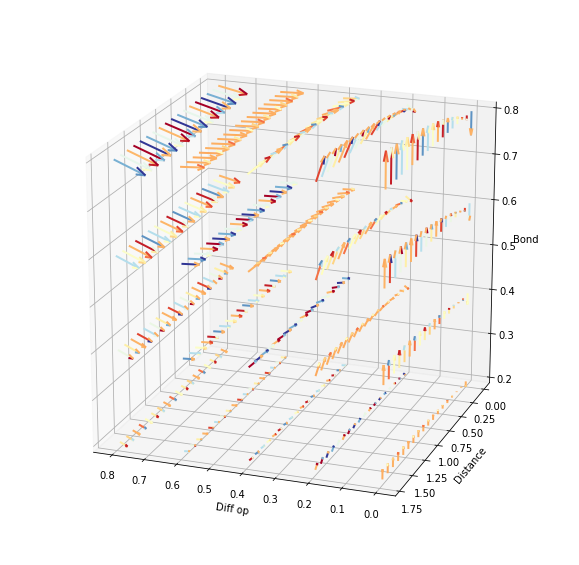

array([[-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.71026492],
       [-0.676875  ,  1.02597835,  0.710

In [135]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

alpha, beta, gamma, delta = [0.75,3,1.6,8.8]

diffop, distanceops, bond = np.meshgrid(np.arange(0, 1, .2), np.arange(0,np.sqrt(3),.1), np.arange(0, 1, .2))

delta_o = alpha*-1*diffop*bond
delta_d = np.sqrt(distanceops**2 - (diffop + delta_o)**2 + diffop + delta_o) -  np.sqrt(distanceops**2 - diffop**2 + diffop)   #1/np.sqrt(distanceops**2 - diffop**2 + diffop)
delta_w = beta*bond*(0.9-0.1**((np.sqrt(diffop**2 + distanceops))/delta))*(1-bond*(0.9-0.1**((np.sqrt(diffop**2 + distanceops))/delta)))*(1-gamma*abs(diffop))

#x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
#                      np.arange(-0.8, 1, 0.2),
#                      np.arange(-0.8, 1, 0.8))

#u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
#v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
#w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
#     np.sin(np.pi * z))



q = ax.quiver(diffop, distanceops, bond, delta_o, delta_d, delta_w, linewidth=2,
             cmap='RdYlBu', length=0.2)#, cmap='RdYlBu', edgecolor='k',

color_array = np.zeros((9,5,5))

for i in range(9):
    for j in range(5):
        for k in range(5):
            
            dop = np.arange(0.01, 1, .2)[j]
            ddt = np.arange(0.01,np.sqrt(3),.2)[i]
            bnd = np.arange(0.01, 1, .2)[k]
            
            #do = alpha*-1*dop*bnd
            dw = beta*bnd*(0.9-0.1**((np.sqrt(dop**2 + dst))/delta))*(1-bnd*(0.9-0.1**((np.sqrt(dop**2 + dst))/delta)))*(1-gamma*abs(dop))
            #print(dw)

            color_array[i,j,k] = np.arctan(dw)

q.set_array(color_array.reshape(-1))

ax.set_xlabel('Diff op')
ax.set_ylabel('Distance')
ax.set_zlabel('Bond')

cmap = plt.cm.viridis


for dop in [0.05, .25, .5, .75, .95]:
    for dst in [0.05, .25, .5, .75, .95]:
        for bnd in [0.05, .25, .5, .75, .95]:
            trajectory = np.zeros((100,3))
            for i in range(100):
                do = alpha*-1*dop*bnd   
                dd = 1/np.sqrt(dst**2 - dop**2 + dop)
                dw = beta*bnd*(0.9-0.1**((np.sqrt(dop**2 + dst))/delta))*(1-bnd*(0.9-0.1**((np.sqrt(dop**2 + dst))/delta)))*(1-gamma*abs(dop))
                
                bnd_next = bnd + dw
                if bnd_next < 0.05:
                    bnd_next = 0
                
                trajectory[i,0] = do
                trajectory[i,1] = dd
                trajectory[i,2] = bnd_next
                
                
            #ax.plot(trajectory[:,0], trajectory[:,1], trajectory[:,2])
#            color = cmap(0.15) if 0 in trajectory[:,2] else cmap(0.75))

#linewidth=0.1)
#ax.plot( )
ax.view_init(20, 110)
plt.show()

#beta*0.5*(0.9-0.1**((np.sqrt(0.1**2 + 0.1))/delta))*(1-0.5*(0.9-0.1**((np.sqrt(0.1**2 + 0.1))/delta)))*(1-gamma*abs(0.1))

trajectory

# alpha = 0.75
beta = 0.9
gamma = 1
delta = 0.1

n_plots = 5

gammas = np.linspace(0.1,4,n_plots)
deltas = np.linspace(0.1,2,n_plots)


diffop, bond = np.meshgrid(np.arange(0, 1, .1), np.arange(0, 1, .1))


fig, axes = plt.subplots(n_plots,n_plots,figsize=(15,10))

distanceops = 0.03

for i,g in enumerate(gammas):
    for j,d in enumerate(deltas):
        
        delta_o = alpha*-1*diffop*bond
        delta_w = beta*bond*(1-bond)*(1-gammas[i]*abs(diffop)) - 0.9*bond*(1 - 0.1**(abs(distanceops)/deltas[j]))
    

        
        axes[n_plots-1 - i,j].set_title(r'$\alpha={},\beta={},\gamma={}, \delta={}$'.format(alpha,beta,gammas[i],deltas[j]),
                           fontsize=8)
        axes[n_plots-1 - i,j].quiver(diffop, bond, delta_o, delta_w, #units='width',
                                    np.sqrt((delta_o)**2 + (delta_w)**2), angles='xy', scale_units='xy',
                                     scale=2, pivot='mid', cmap='seismic',)#,color='g')
        #qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
        #                   coordinates='figure')

        axes[n_plots-1 - i,j].set_xlabel('Difference in opinions')
        axes[n_plots-1 - i,j].set_ylabel('Bond strength')
        axes[n_plots-1 - i,j].axis('off')
        #axes[n_plots-1 - i,j].set_facecolor('grey')
        
#         for opinion, weight in [
#     [0.25, 0.95], [0.45, 0.95], [0.55, 0.95], [0.65, 0.95], [0.75, 0.95],
#     [0.85, 0.95], [0.95, 0.95], [0.35, 0.65], [0.45, 0.75], [0.95, 0.75],
#     [0.95, 0.35], [0.3, 0.25], [0.3, 0.15], [0.15, 0.06], [0.05, 0.06]]:
#             ow = [[opinion, 0.0, weight]]
#             for k in range(100):
#                 delta_o = alpha * ow[-1][2] * (ow[-1][1] - ow[-1][0])
#                 delta_w = (
#                     beta * ow[-1][2] * (1-ow[-1][2]) *
#                     (1-gamma*abs(ow[-1][1] - ow[-1][0])))
#                 new_weight = ow[-1][2] + delta_w
#                 if new_weight < 0.05:
#                     new_weight = 0
#                 ow.append([ow[-1][0] + delta_o, ow[-1][1] - delta_o, new_weight])
#             axes[n_plots-1 - i,j].plot(
#                 [row[0] - row[1] for row in ow],
#                 [row[2] for row in ow],
#                 color=(plt.cm.viridis(0.15) if ow[-1][2] == 0 else plt.cm.viridis(0.75)),
#                 alpha=0.75)

        
        

plt.show()


In [67]:
np.arctan2(delta_o, delta_w)

array([[-3.14159265, -3.14159265, -3.14159265, -3.14159265, -3.14159265,
        -3.14159265, -3.14159265, -3.14159265, -3.14159265, -3.14159265],
       [-0.        , -1.99322098, -2.64484943, -2.73302219, -2.76684633,
        -2.78469031, -2.79570821, -2.80318634, -2.80859392, -2.81268608],
       [-0.        , -0.35287422, -1.65298176, -2.36359615, -2.54775033,
        -2.62512887, -2.66721125, -2.69357483, -2.71161754, -2.72473396],
       [-0.        , -0.3019825 , -1.23850591, -2.11849455, -2.39806643,
        -2.51243834, -2.57299677, -2.61022929, -2.63537212, -2.6534702 ],
       [-0.        , -0.31802967, -1.15728309, -1.97474623, -2.28140797,
        -2.41294822, -2.48355853, -2.5272006 , -2.55674317, -2.57803459],
       [-0.        , -0.36741842, -1.19110779, -1.89311581, -2.18184047,
        -2.31475733, -2.38858923, -2.43509266, -2.46694423, -2.49008297],
       [-0.        , -0.45868029, -1.28619477, -1.84840897, -2.09167451,
        -2.21236363, -2.28249445, -2.3279179 

In [75]:
np.sqrt((delta_o)**2 + (delta_w)**2)

array([[0.06007113, 0.06007113, 0.06007113, 0.06007113, 0.06007113,
        0.06007113, 0.06007113, 0.06007113, 0.06007113, 0.06007113],
       [0.02092887, 0.0082228 , 0.03147525, 0.05663257, 0.08195905,
        0.107335  , 0.13273206, 0.15814005, 0.18355444, 0.20897289],
       [0.08392887, 0.04340324, 0.0301016 , 0.06411593, 0.10722909,
        0.15188082, 0.19702784, 0.24239355, 0.28787459, 0.33342376],
       [0.12892887, 0.07565223, 0.04760405, 0.07906524, 0.13296149,
        0.19117658, 0.25071994, 0.31082918, 0.3712295 , 0.43179878],
       [0.15592887, 0.09593993, 0.06552259, 0.09787762, 0.15831906,
        0.22527296, 0.29432799, 0.36429123, 0.43472442, 0.50543112],
       [0.16492887, 0.10439653, 0.08075108, 0.11860792, 0.18313913,
        0.25482748, 0.32902758, 0.40435906, 0.48028986, 0.55657475],
       [0.15592887, 0.10163401, 0.09377211, 0.1403746 , 0.20752091,
        0.2808432 , 0.35655149, 0.43339716, 0.51086722, 0.58871523],
       [0.12892887, 0.08929311, 0.1061421

In [146]:
import math
math.log(0.9,0.1)

0.04575749056067512

In [23]:
?plt.quiver

In [39]:
abs((2,3))

TypeError: bad operand type for abs(): 'tuple'

In [123]:
np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))[0]

array([[0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       ...,
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ],
       [0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
        1.        ]])

In [130]:
np.meshgrid([0,1],[0,1])[0]

array([[0, 1],
       [0, 1]])

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.2222222

In [157]:
np.arange(0,10).shape

(10,)

In [158]:
np.zeros(10).shape

(10,)

In [214]:
np.linspace(0.1,0.9,4)

array([0.1       , 0.36666667, 0.63333333, 0.9       ])